概要：在准备了线性代数和微积分的知识后，本节了解线性回归模型的数学原理。

1.设置绘图环境。

In [28]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

2.线性回归方程的参数。

$ \hat{\theta} = (X^T \cdot X)^{-1} \cdot X^T \cdot y$

$ \hat\theta $是参数矩阵，该参数可以根据上述方程直接求解。

生成随机数据，测试线性模型：

In [29]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [30]:
X.shape

(100, 1)

显示这些随机数据：

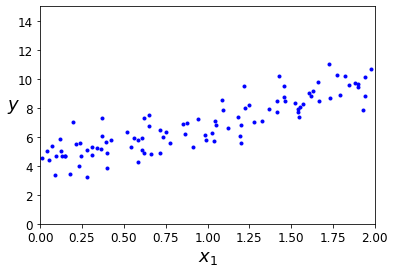

In [31]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

我们用inv，dot来计算：

In [32]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [33]:
theta_best

array([[4.21509616],
       [2.77011339]])

得到的参数值是3.93829632和3.1429825，原始的值是4和3，但由于存在噪声数据，只可能达到
近似值。

预测一下新的值：

In [35]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

将数据集和预测的点画出来：

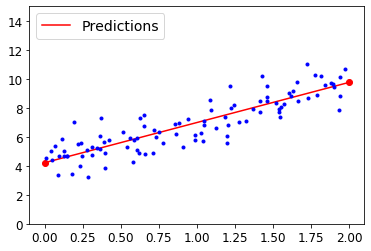

In [41]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X_new, y_predict, "ro")
plt.plot(X, y, "b.")
plt.axis([-0.1, 2.1, 0, 15])
plt.legend(loc="upper left", fontsize=14)
plt.show()

图中的红点，就是预测的点的坐标。

用scikit代码可以实现同样的效果：

In [42]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [43]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

和我们用方程得到的结果是一样的。

3.线性回归模型的损失函数。

我们使用均方差MSE来计算损失函数：

$$ MSE(X, h_\theta) = \frac{1}{m} \sum_{i=0}^m {(\theta^T \cdot x^{(-1)} - y^{(i)} )^2} $$